In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [79]:
# Show all cols
pd.set_option('display.max_column',None)

# presnt scientific notation
pd.set_option('display.float_format','{:.2f}'.format)

in Pandas is used to modify the display settings for DataFrames. Specifically, it instructs Pandas to display all columns in a DataFrame without truncation, regardless of the number of columns present.



In [80]:
df = pd.read_csv('/content/retail_sales_50k.csv')
df.head()

,Order_ID,Customer_ID,Gender,Age,Country,Product_Category,Quantity,Unit_Price,Discount,Order_Date,Payment_Method,Ad_Campaign,Returned,Total_Sales
0,10001,C00861,Male,40,Germany,Fashion,7,5232,0.00,2023-01-01 00:00:00.000000000,Credit Card,B,No,36624.00
1,10002,C03773,Female,32,India,Home,7,8563,0.00,2023-01-01 00:21:01.465229304,Debit Card,A,No,59941.00
2,10003,C03093,Male,28,India,Home,4,3369,0.10,2023-01-01 00:42:02.930458609,Debit Card,A,No,12128.40
3,10004,C00467,Female,38,UAE,Home,4,6796,0.10,2023-01-01 01:03:04.395687913,Debit Card,A,No,24465.60
4,10005,C04427,Male,56,UK,Groceries,7,2949,0.15,2023-01-01 01:24:05.860917218,COD,A,No,17546.55


In [81]:
print(df.shape)

(50000, 14)


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          50000 non-null  int64  
 1   Customer_ID       50000 non-null  object 
 2   Gender            50000 non-null  object 
 3   Age               50000 non-null  int64  
 4   Country           50000 non-null  object 
 5   Product_Category  50000 non-null  object 
 6   Quantity          50000 non-null  int64  
 7   Unit_Price        50000 non-null  int64  
 8   Discount          50000 non-null  float64
 9   Order_Date        50000 non-null  object 
 10  Payment_Method    50000 non-null  object 
 11  Ad_Campaign       50000 non-null  object 
 12  Returned          50000 non-null  object 
 13  Total_Sales       50000 non-null  float64
dtypes: float64(2), int64(4), object(8)
memory usage: 5.3+ MB


In [83]:
print('summary:')
df.describe()

summary:


,Order_ID,Age,Quantity,Unit_Price,Discount,Total_Sales
count,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00
mean,35000.50,38.50,5.00,5058.98,0.06,23590.88
std,14433.90,12.12,2.59,2857.42,0.07,19358.09
min,10001.00,18.00,1.00,100.00,0.00,89.60
25%,22500.75,28.00,3.00,2580.00,0.00,7671.90
50%,35000.50,39.00,5.00,5068.00,0.05,18160.10
75%,47500.25,49.00,7.00,7549.00,0.10,35309.10
max,60000.00,59.00,9.00,9999.00,0.20,89991.00


Data Cleaning and Preprocessing

In [84]:
df['Order_Date']

,Order_Date
0,2023-01-01 00:00:00.000000000
1,2023-01-01 00:21:01.465229304
2,2023-01-01 00:42:02.930458609
3,2023-01-01 01:03:04.395687913
4,2023-01-01 01:24:05.860917218
...,...
49995,2024-12-30 22:35:54.139082784
49996,2024-12-30 22:56:55.604312088
49997,2024-12-30 23:17:57.069541392
49998,2024-12-30 23:38:58.534770696


In [85]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Order_Date'] = df['Order_Date'].dt.strftime("%Y-%m-%d")
df['Order_Date']

,Order_Date
0,2023-01-01
1,2023-01-01
2,2023-01-01
3,2023-01-01
4,2023-01-01
...,...
49995,2024-12-30
49996,2024-12-30
49997,2024-12-30
49998,2024-12-30


In [86]:
# Check missing values:
df.isnull().sum()

,0
Order_ID,0
Customer_ID,0
Gender,0
Age,0
Country,0
Product_Category,0
Quantity,0
Unit_Price,0
Discount,0
Order_Date,0


In [87]:
df.head()

,Order_ID,Customer_ID,Gender,Age,Country,Product_Category,Quantity,Unit_Price,Discount,Order_Date,Payment_Method,Ad_Campaign,Returned,Total_Sales
0,10001,C00861,Male,40,Germany,Fashion,7,5232,0.00,2023-01-01,Credit Card,B,No,36624.00
1,10002,C03773,Female,32,India,Home,7,8563,0.00,2023-01-01,Debit Card,A,No,59941.00
2,10003,C03093,Male,28,India,Home,4,3369,0.10,2023-01-01,Debit Card,A,No,12128.40
3,10004,C00467,Female,38,UAE,Home,4,6796,0.10,2023-01-01,Debit Card,A,No,24465.60
4,10005,C04427,Male,56,UK,Groceries,7,2949,0.15,2023-01-01,COD,A,No,17546.55


In [88]:
df.columns

Index(['Order_ID', 'Customer_ID', 'Gender', 'Age', 'Country',
       'Product_Category', 'Quantity', 'Unit_Price', 'Discount', 'Order_Date',
       'Payment_Method', 'Ad_Campaign', 'Returned', 'Total_Sales'],
      dtype='object')

### UNIVARIATE ANALYSIS

In [89]:
columns = ['Year', 'Age', 'Gender', 'Country', 'Product_Category', 'Quantity', 'Payment_Method',
           'Ad_Campaign']

for col in columns:
  if col in df.columns:
    print(f'Unique Count of {col} Columns : {df[col].nunique()}')
    print('Calue counts of columns: \n', df[col].value_counts())
    print("\n----------------------------------")
  else:
    print(f'Columns {col} not found in the dataframe')


Columns Year not found in the dataframe
Unique Count of Age Columns : 42
Calue counts of columns: 
 Age
40    1284
18    1247
50    1241
28    1239
44    1236
54    1232
32    1219
37    1219
48    1217
56    1215
58    1214
29    1213
31    1211
33    1210
19    1207
39    1202
30    1201
55    1198
43    1189
47    1187
25    1185
34    1184
22    1180
57    1179
24    1173
51    1171
49    1170
26    1169
46    1168
38    1168
21    1167
20    1166
52    1166
35    1165
59    1163
27    1161
42    1157
53    1155
41    1152
23    1144
36    1143
45    1133
Name: count, dtype: int64

----------------------------------
Unique Count of Gender Columns : 2
Calue counts of columns: 
 Gender
Female    25114
Male      24886
Name: count, dtype: int64

----------------------------------
Unique Count of Country Columns : 5
Calue counts of columns: 
 Country
India      19877
UAE        10053
USA         9933
UK          5119
Germany     5018
Name: count, dtype: int64

--------------------------

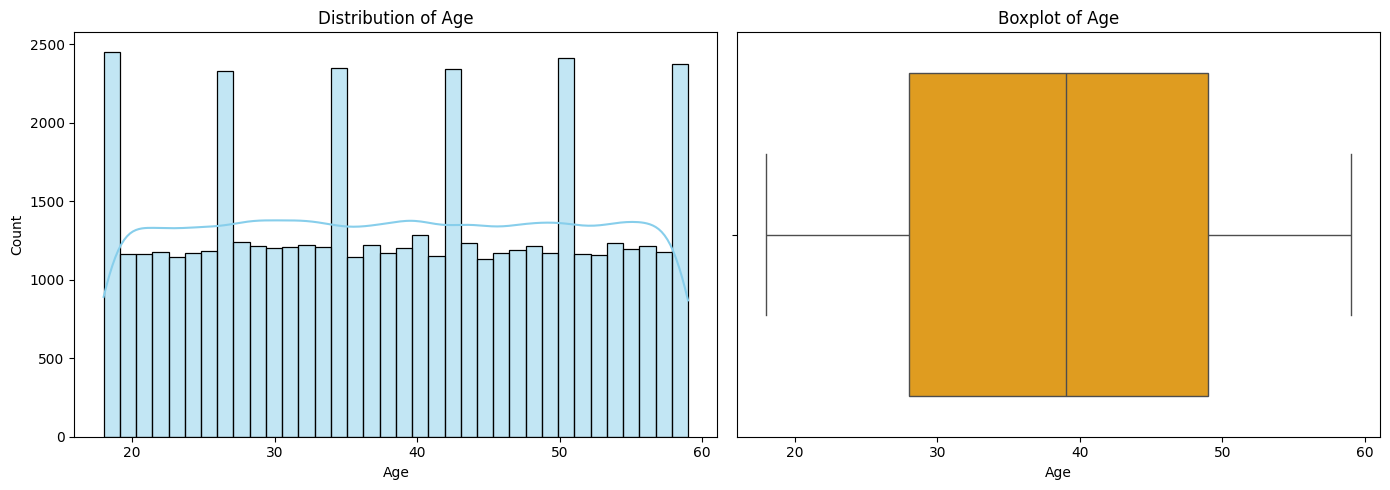

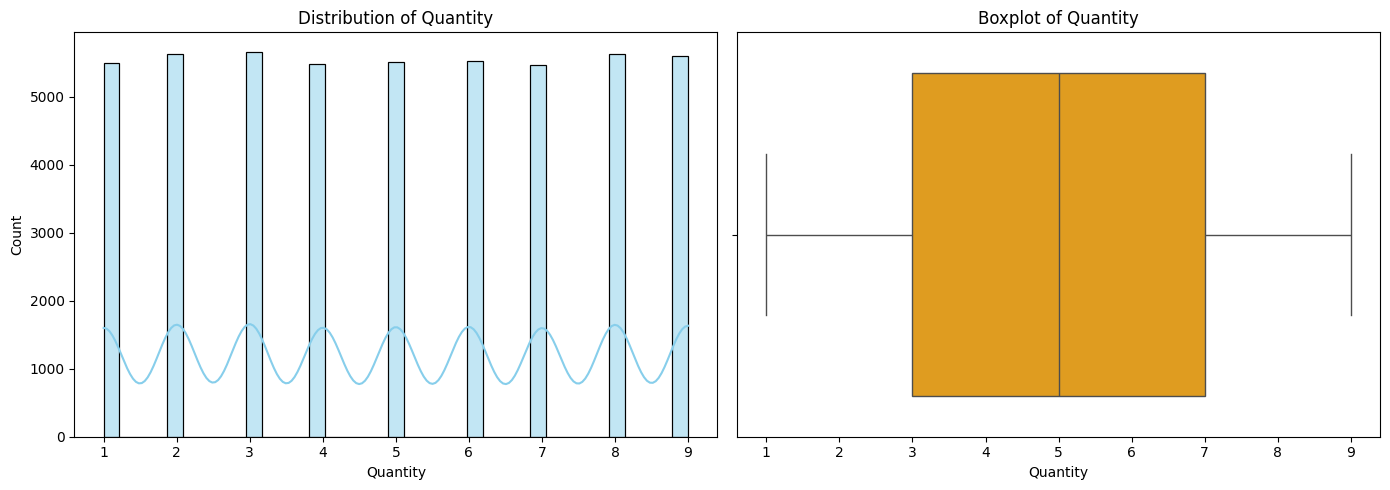

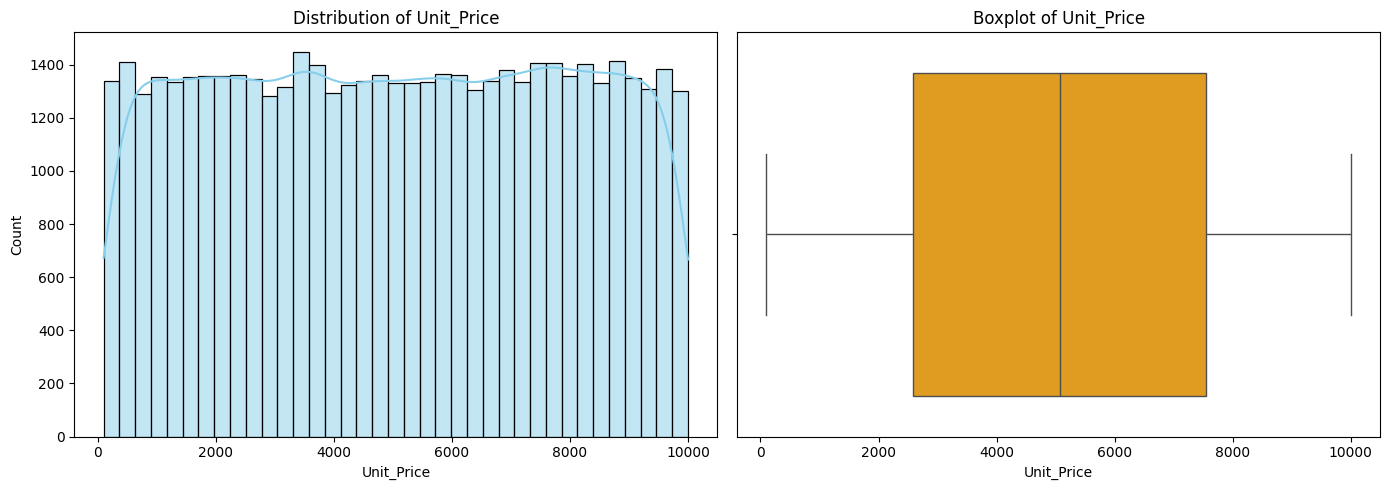

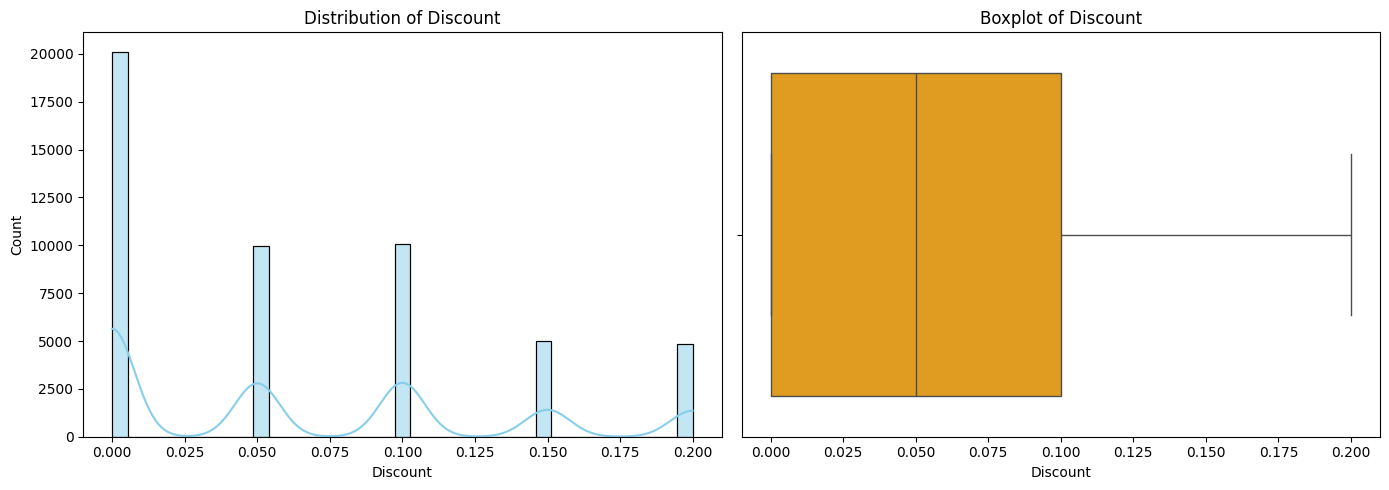

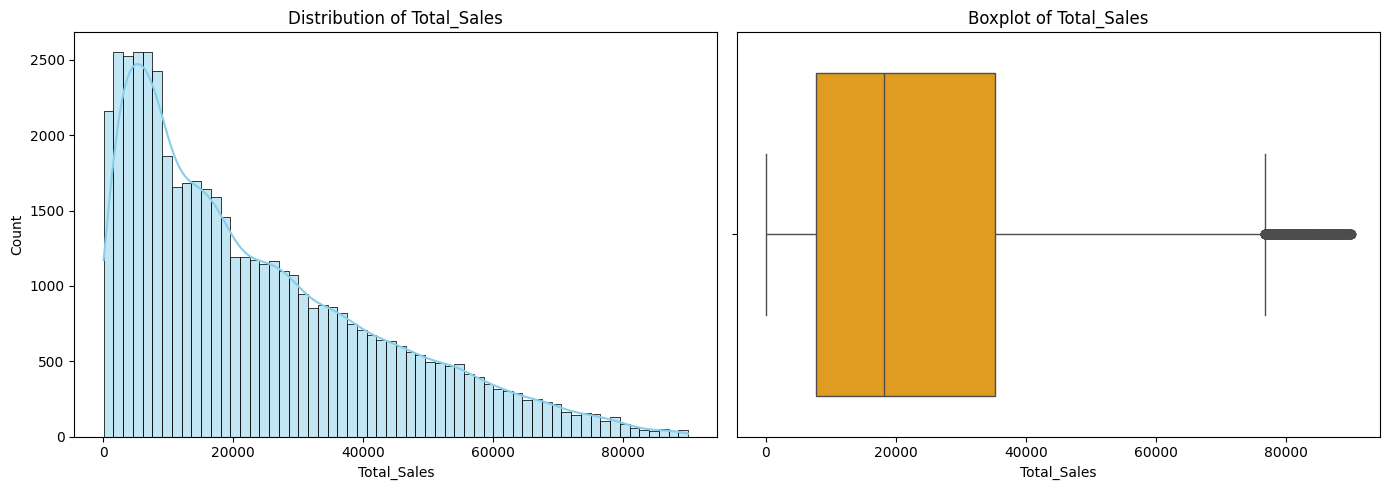

In [90]:
numerical_cols = ['Age', 'Quantity', 'Unit_Price', 'Discount', 'Total_Sales']

for col in numerical_cols:
  plt.figure(figsize=(14,5))

  # Histogram
  plt.subplot(1,2,1)
  sns.histplot(df[col], kde=True, color='skyblue')
  plt.title(f'Distribution of {col}')

  # Boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=df[col], color='orange')
  plt.title(f'Boxplot of {col}')

  plt.tight_layout()
  plt.show()

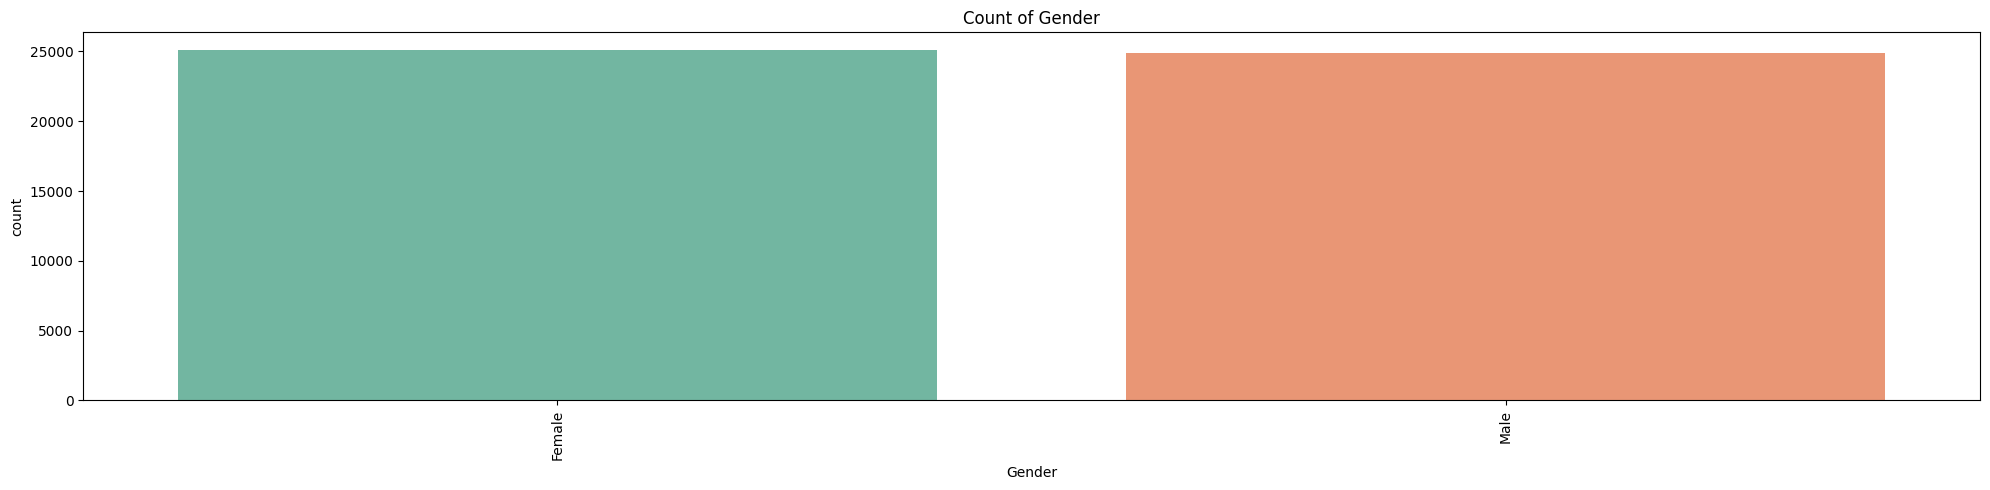

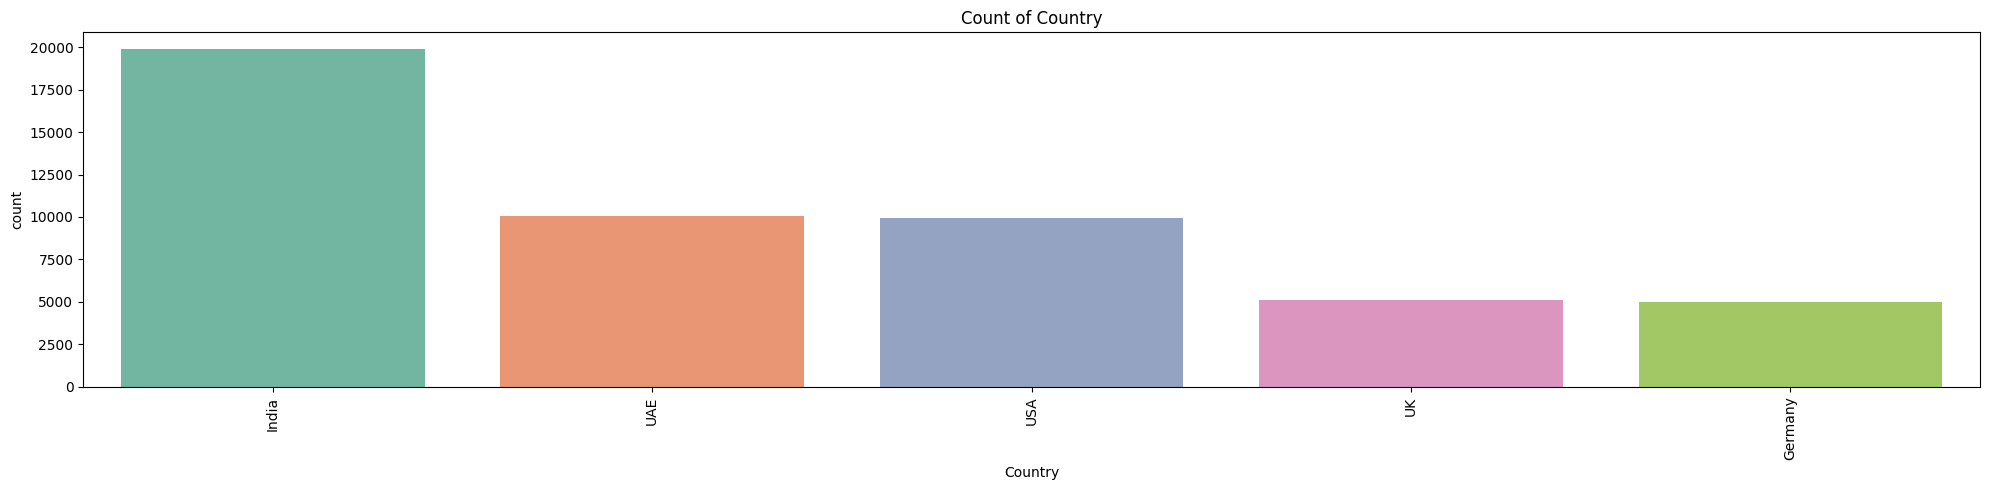

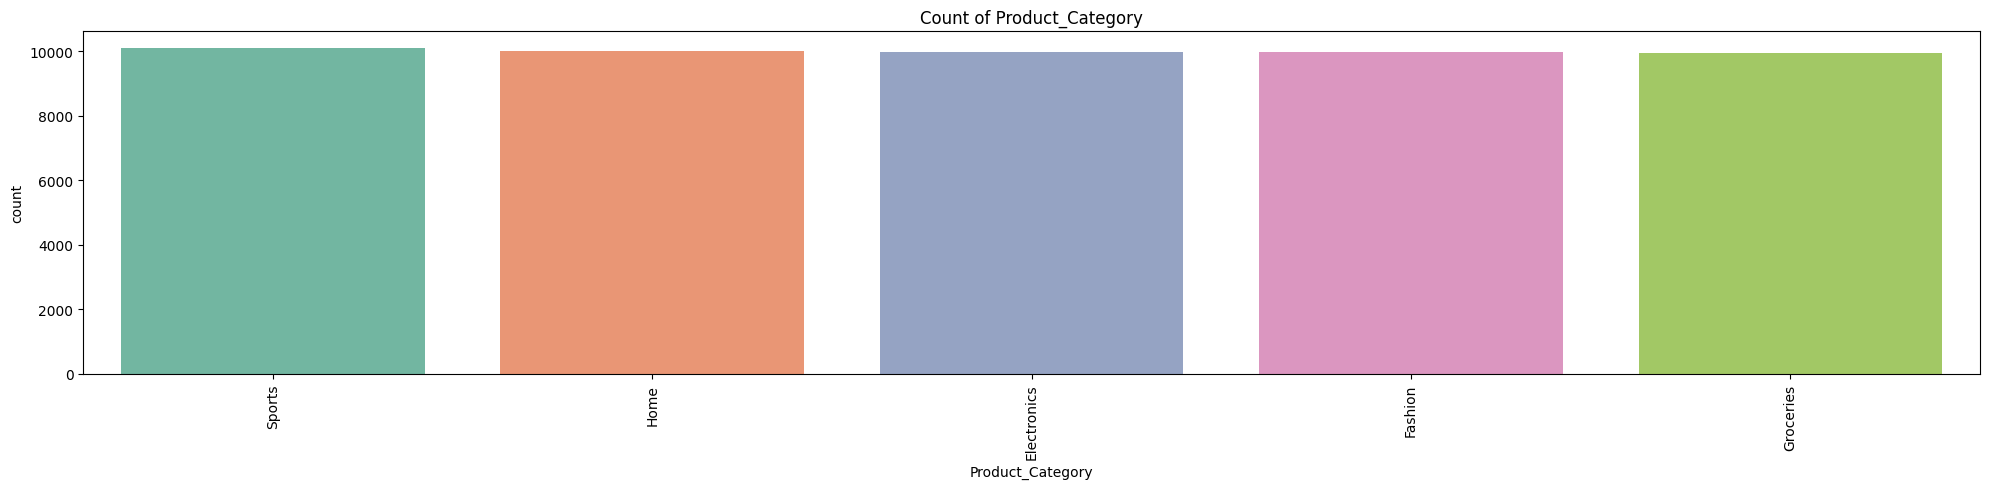

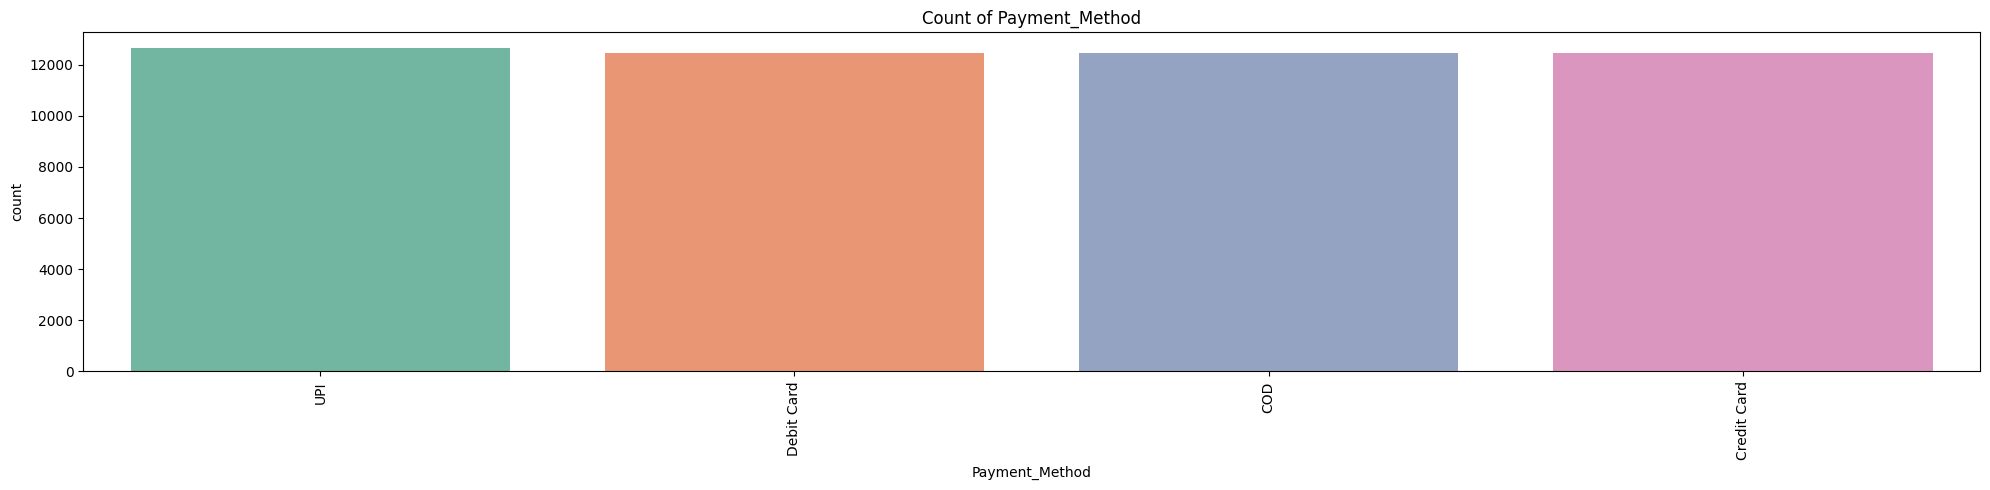

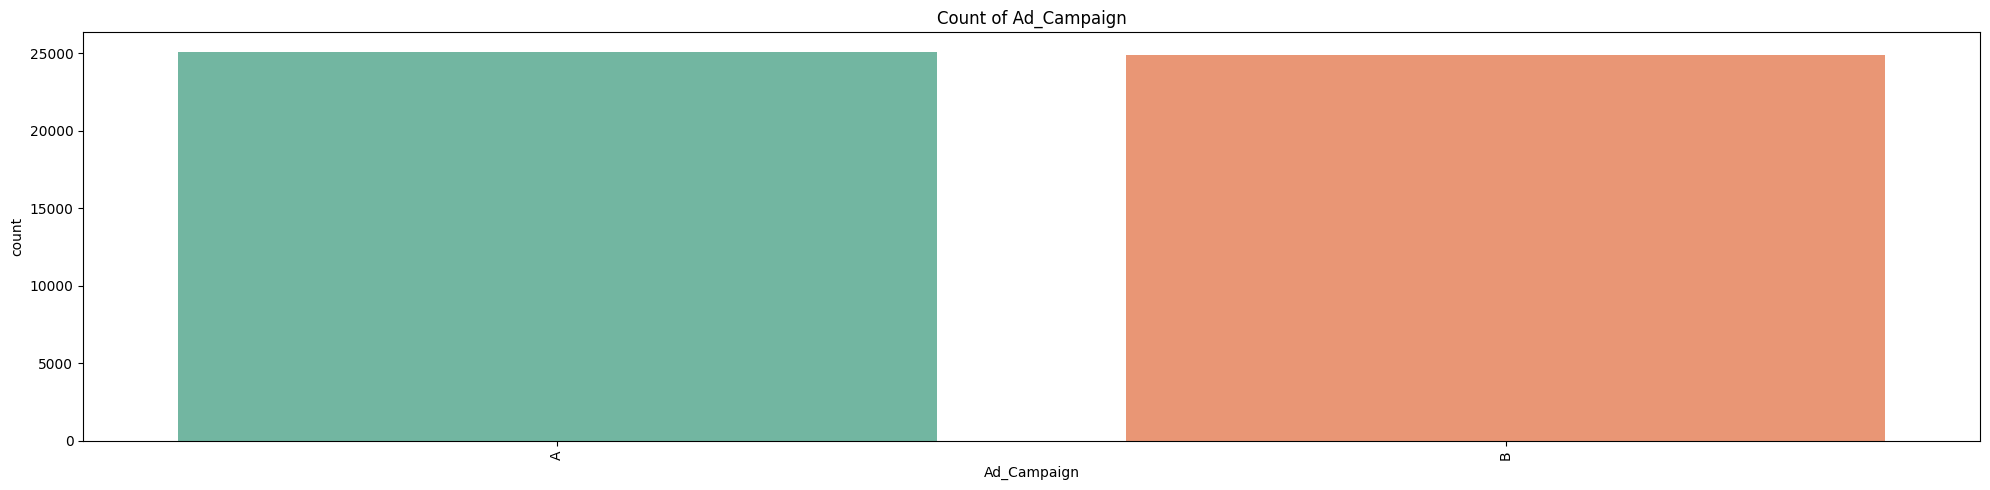

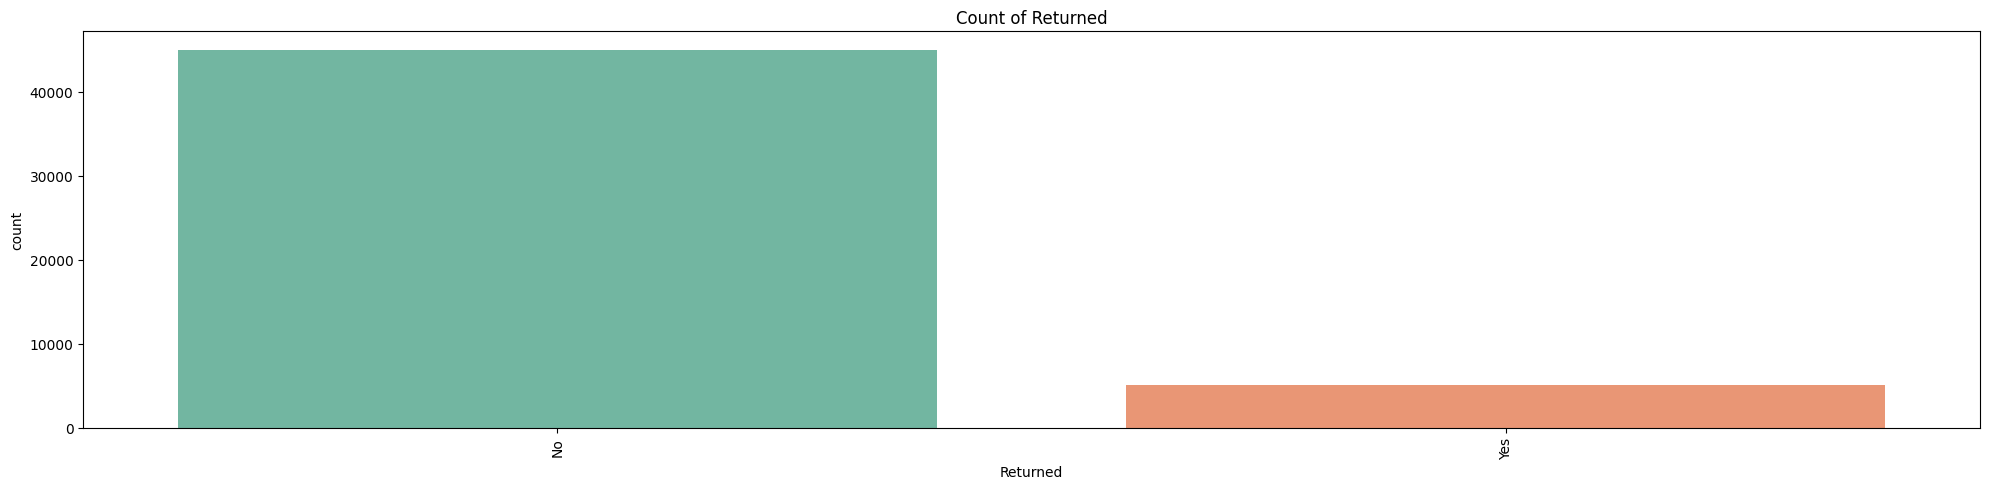

In [91]:
categorical_cols = ['Gender', 'Country','Product_Category', 'Payment_Method',
                    'Ad_Campaign', 'Returned']

for col in categorical_cols:
  plt.figure(figsize=(20,5))
  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='Set2')
  plt.xticks(rotation=90)
  plt.title(f'Count of {col}')
  plt.tight_layout()
  plt.show()

### BIVARIATE ANALYSIS

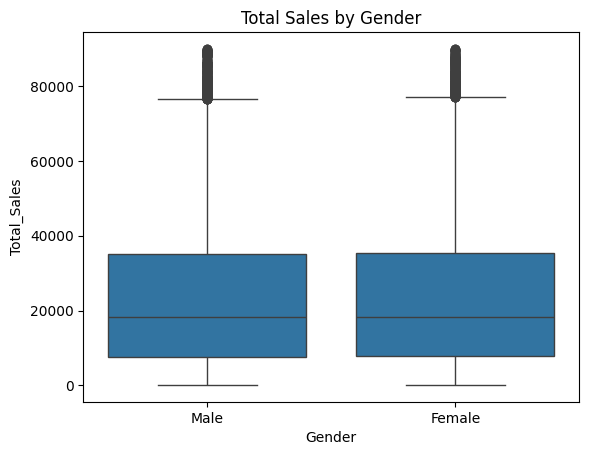


-------------------------------


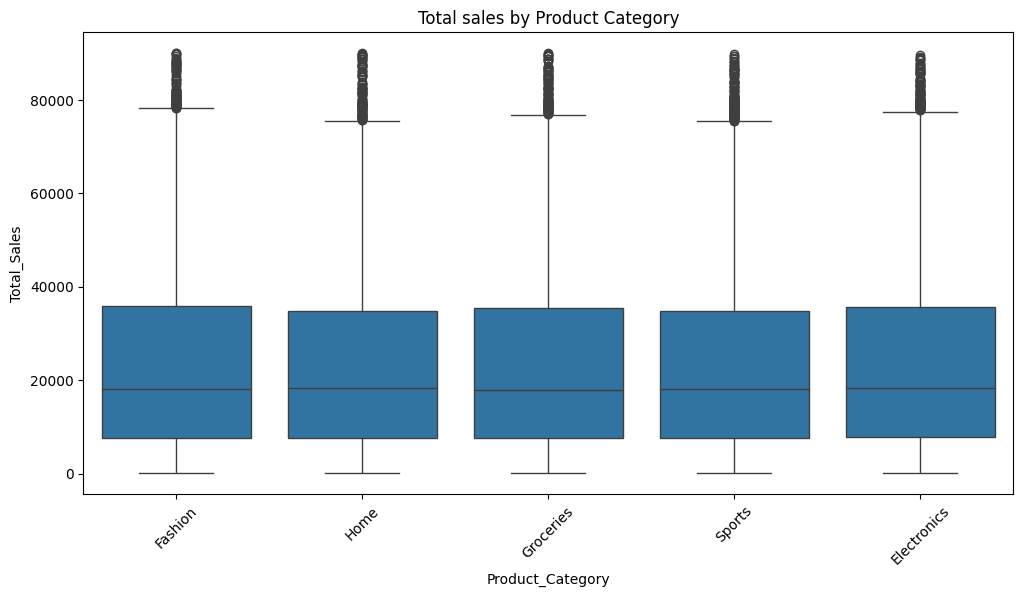


-------------------------------


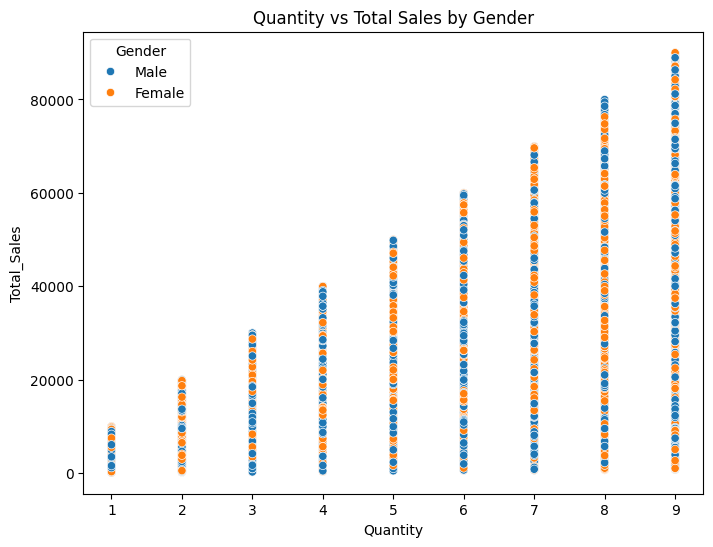

In [92]:
# Revenue by Gender
sns.boxplot(x='Gender', y='Total_Sales', data=df)
plt.title("Total Sales by Gender")
plt.show()

print('\n-------------------------------')
# Revenue by Product Category
y1=df['Product_Category']
y2=df['Total_Sales']
plt.figure(figsize=(12,6))
sns.boxplot(x=y1, y=y2)
plt.xticks(rotation=45)
plt.title('Total sales by Product Category')
plt.show()

print('\n-------------------------------')

# Quantity vs Revenue
plt.figure(figsize=(8,6))
sns.scatterplot(x='Quantity', y='Total_Sales',data=df, hue='Gender')
plt.title('Quantity vs Total Sales by Gender')
plt.show()

• Top & bottom products by total revenue

• Top & bottom products by total quantity sold

• Top & bottom products by total profit (assuming Profit = Revenue - Cost)

In [93]:
df.columns

Index(['Order_ID', 'Customer_ID', 'Gender', 'Age', 'Country',
       'Product_Category', 'Quantity', 'Unit_Price', 'Discount', 'Order_Date',
       'Payment_Method', 'Ad_Campaign', 'Returned', 'Total_Sales'],
      dtype='object')

In [94]:
df.head(1)

,Order_ID,Customer_ID,Gender,Age,Country,Product_Category,Quantity,Unit_Price,Discount,Order_Date,Payment_Method,Ad_Campaign,Returned,Total_Sales
0,10001,C00861,Male,40,Germany,Fashion,7,5232,0.00,2023-01-01,Credit Card,B,No,36624.00


In [95]:
# ----- Step:1 Create Unit Cost & Profit
df['Unit_Cost'] = df['Unit_Price'] * 0.7 # Assume 70% cost
df['Profit'] = (df['Unit_Price'] - df['Unit_Cost']) * df['Quantity']

# ----- Step:2 Groupby product Category
product_perf = df.groupby('Product_Category').agg({
    'Quantity' : 'sum',
    'Total_Sales' : 'sum',
    'Profit' : 'sum'
}).sort_values(by='Profit', ascending=False)

# ----- Step:3 Show the full performance table
print("Product Performance Summary")
print(product_perf)

Product Performance Summary
                  Quantity  Total_Sales      Profit
Product_Category                                   
Electronics          50168 238001936.80 76289367.30
Sports               50242 237584019.20 76223923.20
Fashion              49945 235476486.00 75491202.90
Home                 49915 234025872.70 75115932.30
Groceries            49777 234455479.45 75091210.80


In [96]:
# Top 5 products by Total sales
top5_Sales = product_perf.sort_values(by='Total_Sales', ascending=False)
print('----------Top 5 products by Total sales---------')
top5_Sales.head()

----------Top 5 products by Total sales---------


,Quantity,Total_Sales,Profit
Product_Category,,,
Electronics,50168,238001936.80,76289367.30
Sports,50242,237584019.20,76223923.20
Fashion,49945,235476486.00,75491202.90
Groceries,49777,234455479.45,75091210.80
Home,49915,234025872.70,75115932.30


In [97]:
# Bottom 5 products by Total Sales
bottom5_Sales = product_perf.sort_values(by='Total_Sales', ascending=True)
print('-------Bottom 5 products by Total Sales-------')
bottom5_Sales.head()

-------Bottom 5 products by Total Sales-------


,Quantity,Total_Sales,Profit
Product_Category,,,
Home,49915,234025872.70,75115932.30
Groceries,49777,234455479.45,75091210.80
Fashion,49945,235476486.00,75491202.90
Sports,50242,237584019.20,76223923.20
Electronics,50168,238001936.80,76289367.30


In [98]:
# Top 5 products by Quantity Sold
top_Quantity = product_perf.sort_values(by='Quantity', ascending=False).head()
print('-----------Top 5 products by Quantity Sold----------')
top_Quantity

-----------Top 5 products by Quantity Sold----------


,Quantity,Total_Sales,Profit
Product_Category,,,
Sports,50242,237584019.20,76223923.20
Electronics,50168,238001936.80,76289367.30
Fashion,49945,235476486.00,75491202.90
Home,49915,234025872.70,75115932.30
Groceries,49777,234455479.45,75091210.80


In [99]:
# Bottom 5 Products by Quantity Sold
bottom_quantity = product_perf.sort_values(by='Quantity', ascending=True).head(5)
print("------- Bottom 5 Products by Quantity Sold:--------")
print(bottom_quantity)

------- Bottom 5 Products by Quantity Sold:--------
                  Quantity  Total_Sales      Profit
Product_Category                                   
Groceries            49777 234455479.45 75091210.80
Home                 49915 234025872.70 75115932.30
Fashion              49945 235476486.00 75491202.90
Electronics          50168 238001936.80 76289367.30
Sports               50242 237584019.20 76223923.20


In [100]:
# Top 5 products by profit
top5_profit = product_perf.sort_values(by='Profit', ascending=False).head()
print('---------Top 5 products by profit-------')
print(top5_profit)

---------Top 5 products by profit-------
                  Quantity  Total_Sales      Profit
Product_Category                                   
Electronics          50168 238001936.80 76289367.30
Sports               50242 237584019.20 76223923.20
Fashion              49945 235476486.00 75491202.90
Home                 49915 234025872.70 75115932.30
Groceries            49777 234455479.45 75091210.80


In [101]:
# Bottom 5 Products by Profit
bottom_profit = product_perf.sort_values(by='Profit', ascending=True).head(5)
print("---------Bottom 5 Products by Profit:-----------")
print(bottom_profit)

---------Bottom 5 Products by Profit:-----------
                  Quantity  Total_Sales      Profit
Product_Category                                   
Groceries            49777 234455479.45 75091210.80
Home                 49915 234025872.70 75115932.30
Fashion              49945 235476486.00 75491202.90
Sports               50242 237584019.20 76223923.20
Electronics          50168 238001936.80 76289367.30


In [102]:
df.columns

Index(['Order_ID', 'Customer_ID', 'Gender', 'Age', 'Country',
       'Product_Category', 'Quantity', 'Unit_Price', 'Discount', 'Order_Date',
       'Payment_Method', 'Ad_Campaign', 'Returned', 'Total_Sales', 'Unit_Cost',
       'Profit'],
      dtype='object')

In [103]:
# category-wise revenue/profit Share
category_share = product_perf[['Total_Sales', 'Profit']].apply(lambda x: x/x.sum() * 100)
print(category_share)

                  Total_Sales  Profit
Product_Category                     
Electronics             20.18   20.17
Sports                  20.14   20.15
Fashion                 19.96   19.96
Home                    19.84   19.86
Groceries               19.88   19.85


In [104]:
# Revenue vs Quanlity corelation
product_perf[['Quantity', 'Total_Sales', 'Profit']].corr()

,Quantity,Total_Sales,Profit
Quantity,1.00,0.92,0.95
Total_Sales,0.92,1.00,0.99
Profit,0.95,0.99,1.00


In [105]:
gender_perf = df.groupby('Gender').agg({
    'Total_Sales':'sum',
    'Profit':'sum'
})
print(gender_perf)

        Total_Sales       Profit
Gender                          
Female 594913301.40 190727994.90
Male   584630492.75 187483641.60


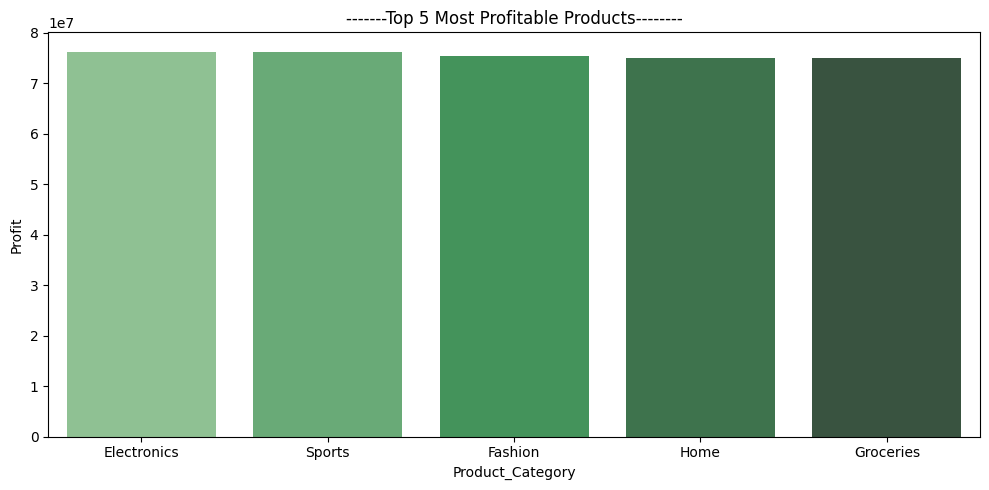

In [106]:
# Top 5 profitable Products:
top5_profit = product_perf.sort_values(by='Profit', ascending=False).head()
plt.figure(figsize=(10,5))

sns.barplot(x=top5_profit.index, y=top5_profit['Profit'], palette='Greens_d')
plt.title('-------Top 5 Most Profitable Products--------')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()

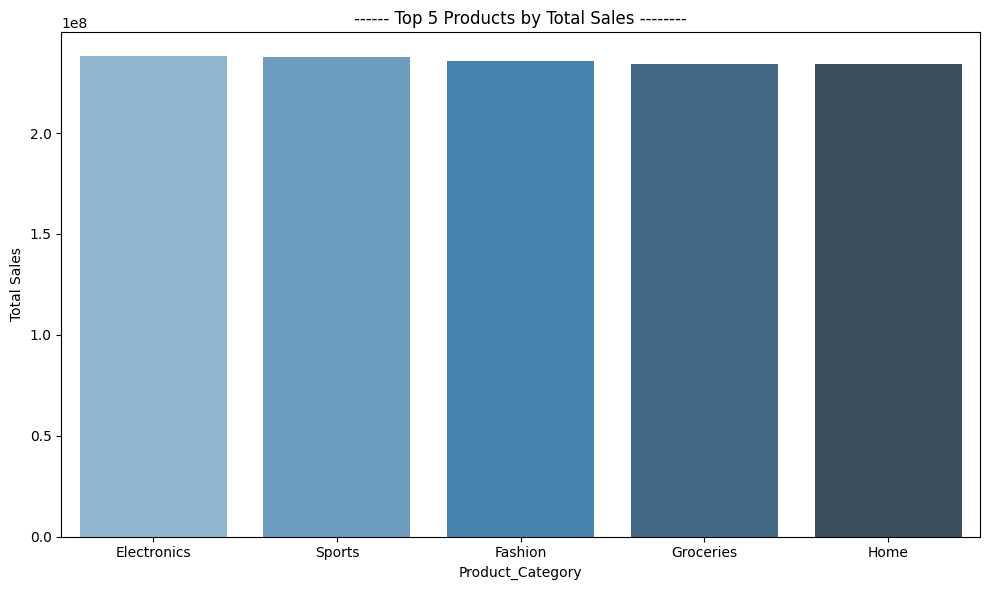

In [107]:
# Top 5 Products by Total Sales
top5_Sales = product_perf.sort_values(by='Total_Sales',ascending=False).head()
plt.figure(figsize=(10,6))
sns.barplot(x=top5_Sales.index, y=top5_Sales['Total_Sales'], palette='Blues_d')
plt.title('------ Top 5 Products by Total Sales --------')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

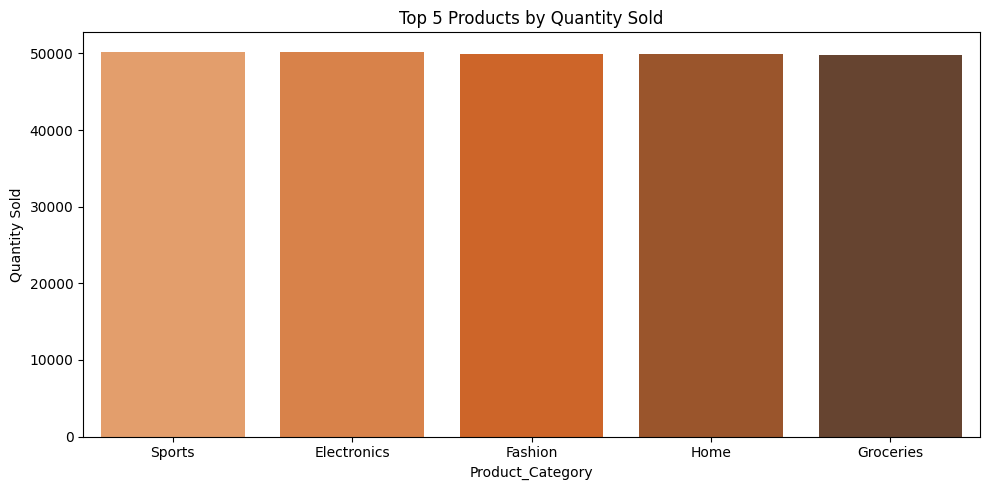

In [108]:
top_Quantity = product_perf.sort_values(by='Quantity', ascending=False).head()
plt.figure(figsize=(10,5))
sns.barplot(x=top_Quantity.index, y=top_Quantity['Quantity'],palette='Oranges_d')
plt.title("Top 5 Products by Quantity Sold")
plt.ylabel("Quantity Sold")
plt.tight_layout()
plt.show()

In [109]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')


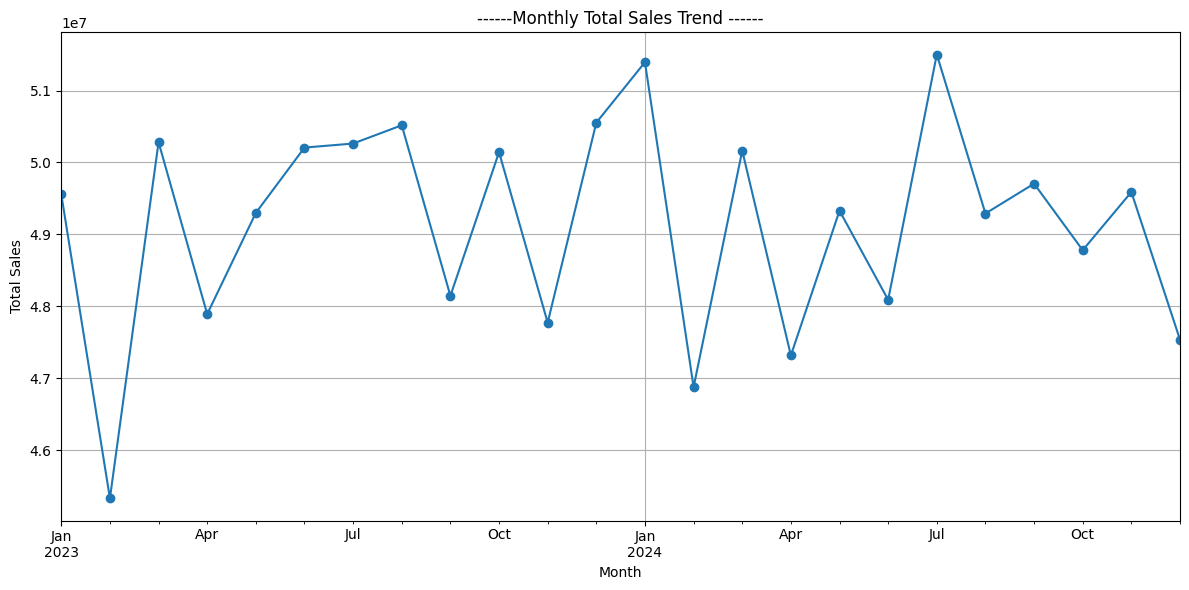

In [110]:
# Monthly Total Sales Trend
df['Month_Year'] = df['Order_Date'].dt.to_period('M')
monthly_sales = df.groupby('Month_Year')['Total_Sales'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o')
plt.title('------Monthly Total Sales Trend ------')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

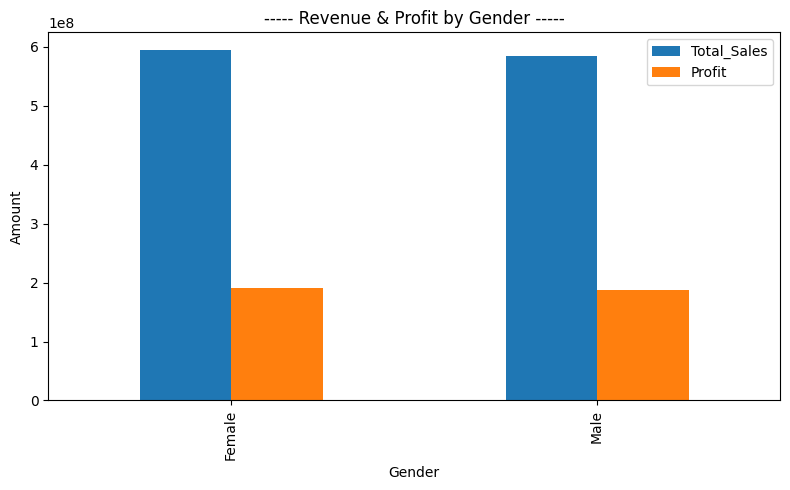

In [111]:
gender_perf[['Total_Sales', 'Profit']].plot(kind='bar', figsize=(8,5))
plt.title('----- Revenue & Profit by Gender -----')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()

### MULTIVARIATE ANALYSIS

In [112]:
df.columns

Index(['Order_ID', 'Customer_ID', 'Gender', 'Age', 'Country',
       'Product_Category', 'Quantity', 'Unit_Price', 'Discount', 'Order_Date',
       'Payment_Method', 'Ad_Campaign', 'Returned', 'Total_Sales', 'Unit_Cost',
       'Profit', 'Month_Year'],
      dtype='object')

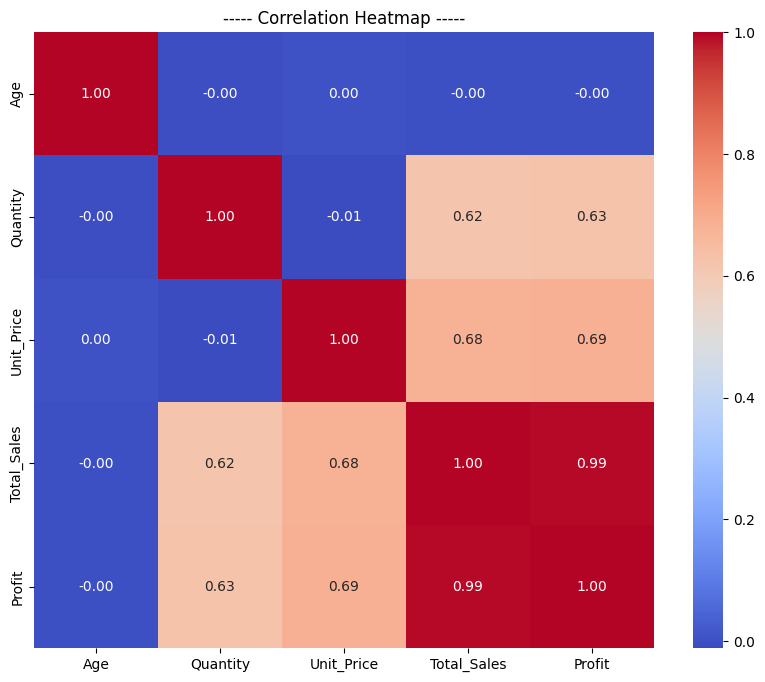

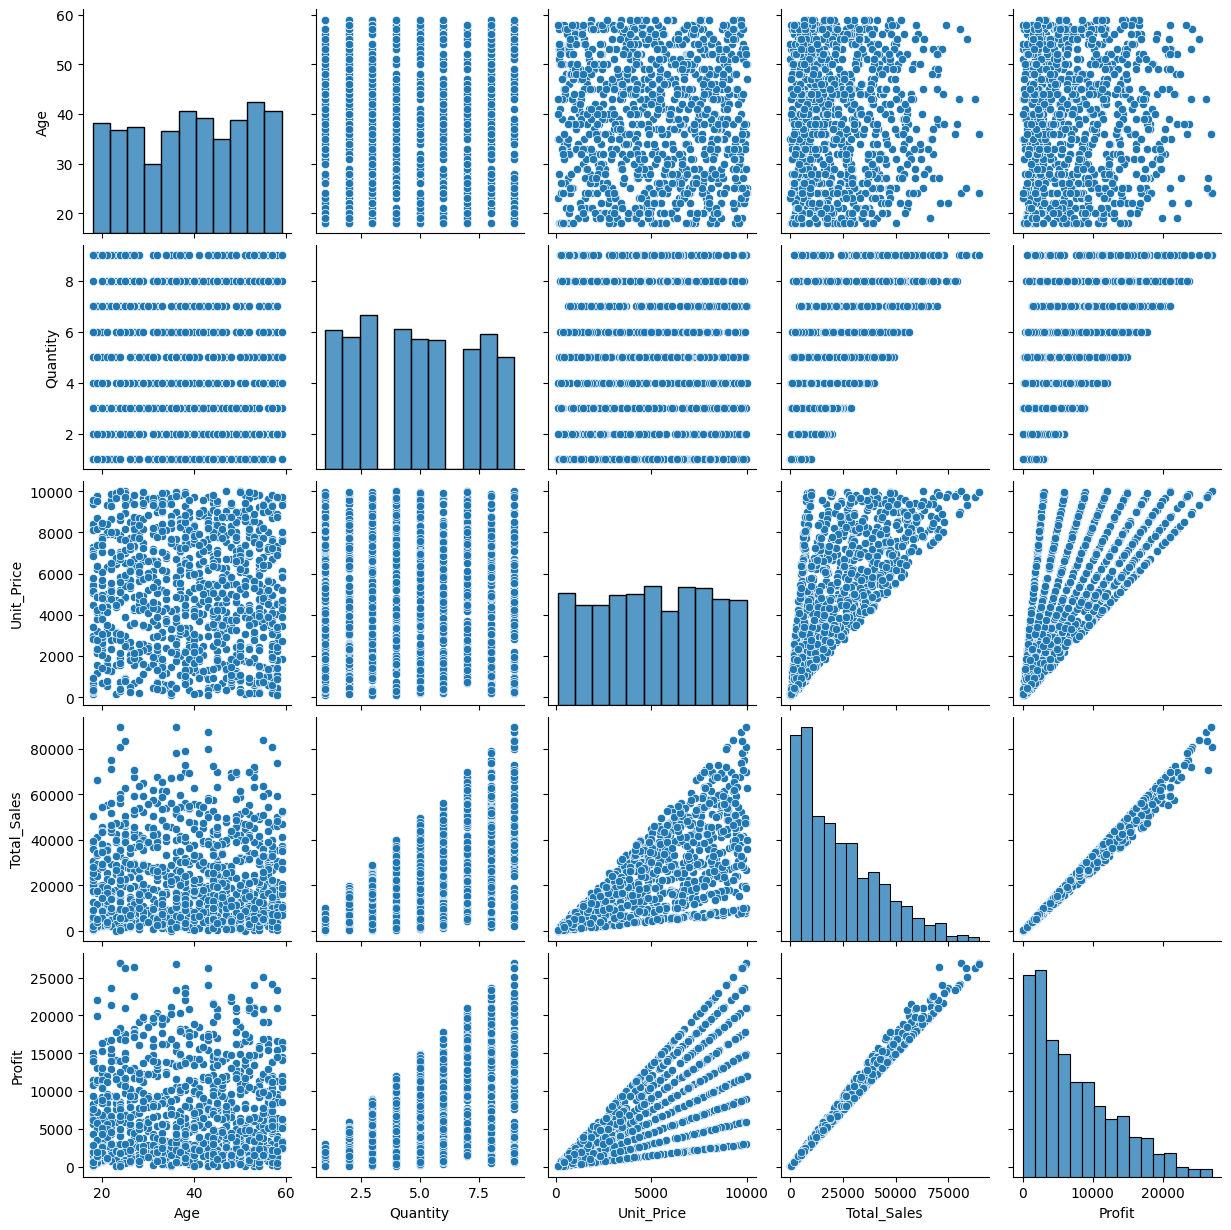

In [113]:
# Numerical Columns
numerical_cols = ['Age', 'Quantity', 'Unit_Price', 'Total_Sales', 'Profit']

# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('----- Correlation Heatmap -----')
plt.show()

# 2. Pairplot (Sample for large dataset)
sample_df = df[numerical_cols].sample(1000, random_state=1) # 1000 random rows
sns.pairplot(sample_df)
plt.show()

In [114]:
# Hypothesis Testing
df.groupby('Gender')['Total_Sales'].agg(['sum','mean','max','min'])

,sum,mean,max,min
Gender,,,,
Female,594913301.40,23688.51,89991.00,97.85
Male,584630492.75,23492.34,89991.00,89.60


In [115]:
# Male and Female Total Sales
revenue_by_gender = df.groupby('Gender')['Total_Sales'].sum().reset_index()
revenue_by_gender

,Gender,Total_Sales
0,Female,594913301.40
1,Male,584630492.75


In [118]:
# Grouping by Gender and Product Category
subcat_by_gender = df.groupby(['Gender', 'Product_Category'])['Total_Sales'].sum().reset_index()
subcat_by_gender = subcat_by_gender.sort_values(by='Total_Sales', ascending=False)

# Ranking by Gender
subcat_by_gender['Rank'] = subcat_by_gender.groupby('Gender')['Total_Sales'].rank(method='dense', ascending=False)

# Top 5 per Gender
top5_subcat_by_gender = subcat_by_gender[subcat_by_gender['Rank'] <= 5].sort_values(by='Gender')
top5_subcat_by_gender

,Gender,Product_Category,Total_Sales,Rank
0,Female,Electronics,120577510.10,1.00
4,Female,Sports,120082832.05,2.00
2,Female,Groceries,118984478.40,3.00
1,Female,Fashion,117639557.85,4.00
3,Female,Home,117628923.00,5.00
6,Male,Fashion,117836928.15,1.00
9,Male,Sports,117501187.15,2.00
5,Male,Electronics,117424426.70,3.00
8,Male,Home,116396949.70,4.00
7,Male,Groceries,115471001.05,5.00


In [119]:
# Grouping by Gender and Product Category
subcat_by_gender_qty = df.groupby(['Gender', 'Product_Category'])['Quantity'].sum().reset_index()
subcat_by_gender_qty = subcat_by_gender_qty.sort_values(by='Quantity', ascending=False)

# Ranking by Gender
subcat_by_gender_qty['Rank'] = subcat_by_gender_qty.groupby('Gender')['Quantity'].rank(method='dense', ascending=False)

# Top 5 per Gender
top5_subcat_by_gender_qty = subcat_by_gender_qty[subcat_by_gender['Rank'] <= 5].sort_values(by='Gender')
top5_subcat_by_gender_qty

,Gender,Product_Category,Quantity,Rank
0,Female,Electronics,25297,1.00
4,Female,Sports,25279,2.00
2,Female,Groceries,25141,3.00
1,Female,Fashion,24899,4.00
3,Female,Home,24854,5.00
8,Male,Home,25061,1.00
6,Male,Fashion,25046,2.00
9,Male,Sports,24963,3.00
5,Male,Electronics,24871,4.00
7,Male,Groceries,24636,5.00


In [121]:
df.head()

,Order_ID,Customer_ID,Gender,Age,Country,Product_Category,Quantity,Unit_Price,Discount,Order_Date,Payment_Method,Ad_Campaign,Returned,Total_Sales,Unit_Cost,Profit,Month_Year
0,10001,C00861,Male,40,Germany,Fashion,7,5232,0.00,2023-01-01,Credit Card,B,No,36624.00,3662.40,10987.20,2023-01
1,10002,C03773,Female,32,India,Home,7,8563,0.00,2023-01-01,Debit Card,A,No,59941.00,5994.10,17982.30,2023-01
2,10003,C03093,Male,28,India,Home,4,3369,0.10,2023-01-01,Debit Card,A,No,12128.40,2358.30,4042.80,2023-01
3,10004,C00467,Female,38,UAE,Home,4,6796,0.10,2023-01-01,Debit Card,A,No,24465.60,4757.20,8155.20,2023-01
4,10005,C04427,Male,56,UK,Groceries,7,2949,0.15,2023-01-01,COD,A,No,17546.55,2064.30,6192.90,2023-01


In [122]:
df['Year'] = df['Order_Date'].dt.to_period('Y')

In [123]:
df.head()

,Order_ID,Customer_ID,Gender,Age,Country,Product_Category,Quantity,Unit_Price,Discount,Order_Date,Payment_Method,Ad_Campaign,Returned,Total_Sales,Unit_Cost,Profit,Month_Year,Year
0,10001,C00861,Male,40,Germany,Fashion,7,5232,0.00,2023-01-01,Credit Card,B,No,36624.00,3662.40,10987.20,2023-01,2023
1,10002,C03773,Female,32,India,Home,7,8563,0.00,2023-01-01,Debit Card,A,No,59941.00,5994.10,17982.30,2023-01,2023
2,10003,C03093,Male,28,India,Home,4,3369,0.10,2023-01-01,Debit Card,A,No,12128.40,2358.30,4042.80,2023-01,2023
3,10004,C00467,Female,38,UAE,Home,4,6796,0.10,2023-01-01,Debit Card,A,No,24465.60,4757.20,8155.20,2023-01,2023
4,10005,C04427,Male,56,UK,Groceries,7,2949,0.15,2023-01-01,COD,A,No,17546.55,2064.30,6192.90,2023-01,2023


In [125]:
df['Year'].unique()

<PeriodArray>
['2023', '2024']
Length: 2, dtype: period[Y-DEC]

Z-Test : Compare Revenue Of the Year 2023 and 2024
Null Hypothesis (H0): The revenue of the year 2023 is equal to the revenue year 2024.
Alternative Hypothesis (H1) : The revenue 2023 is different from 2024.

In [126]:
from scipy import stats

# Select Revenue for each year
revenue_2023 = df[df['Year'] == '2023']['Total_Sales']
revenue_2024 = df[df['Year'] == '2024']['Total_Sales']

# Perform independent 2-sample T-Test
t_stat, p_value = stats.ttest_ind(revenue_2023, revenue_2024, equal_var=False)

print(f'T-Test Statistic : {t_stat:.4f}')
print(f'P-value: {p_value: .4f}')

# Interpretation
if p_value < 0.05:
  print("Reject Null Hypothesis: Revenue in 2023 & 2024 is significantly different.")
else:
  print("Accept Null Hypothesis: No significant difference in revenue between 2023 & 2024.")


T-Test Statistic : 0.0904
P-value:  0.9280
Accept Null Hypothesis: No significant difference in revenue between 2023 & 2024.


In [131]:
df.groupby('Year')['Total_Sales'].agg(
    Total_Sum='sum',
    Total_Mean='mean',
    Total_Max='max',
    Total_Min='min'
)


,Total_Sum,Total_Mean,Total_Max,Total_Min
Year,,,,
2023,589967593.95,23598.70,89991.00,96.30
2024,589576200.20,23583.05,89991.00,89.60


In [132]:
# Grouping by Year & Product Category
category_by_year = df.groupby(['Year', 'Product_Category'])['Quantity'].sum().reset_index()

# Rank categories per year
category_by_year['Rank'] = category_by_year.groupby('Year')['Quantity'].rank(method='dense', ascending=False)

# Filter top 5 per year
top5_category_per_year = category_by_year[category_by_year['Rank'] <= 5].sort_values(by='Year')

# Show Final Table
top5_category_per_year

,Year,Product_Category,Quantity,Rank
0,2023,Electronics,24851,4.00
1,2023,Fashion,25150,2.00
2,2023,Groceries,25186,1.00
3,2023,Home,24885,3.00
4,2023,Sports,24839,5.00
5,2024,Electronics,25317,2.00
6,2024,Fashion,24795,4.00
7,2024,Groceries,24591,5.00
8,2024,Home,25030,3.00
9,2024,Sports,25403,1.00


In [133]:
from scipy import stats

# Revenue by Product Category
anova_data = [group['Total_Sales'] for name, group in df.groupby('Product_Category')]
f_stat, p_val = stats.f_oneway(*anova_data)

print('ANOVA: Revenue by Product Category')
print(f'F-Statistics = {f_stat:.4f}, P-value = {p_val:.4f}')

# Interpretation
if p_val < 0.05:
  print('Reject Null Hypothesis: Revenue significantly changed by Product Category')
else:
  print('Accept Null Hypothesis: Revenue did not significantly change by product category')

ANOVA: Revenue by Product Category
F-Statistics = 0.8026, P-value = 0.5233
Accept Null Hypothesis: Revenue did not significantly change by product category


*   Chi-Square Test: Relationship Between Customer Gender and Product Category

Null Hypothesis (H0) : There is no relationship between customer gender and product category.
Alternative Hypothesis (H1) : There is a significant relationship between customer gender and
product category.

In [136]:
from scipy.stats import chi2_contingency

# Contingency Table
contingency = pd.crosstab(df['Gender'], df['Product_Category'])
print('Contingency Table: \n', contingency)

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

print(f'Chi-square Statistics: {chi2:.4f}')
print(f'Degree of freedom: {dof}')
print(f'P-Value: {p:.4f}')

# Interpretation
if p<0.05:
  print("￿ Reject Null Hypothesis: Gender and Product Category are dependent.")
else:
  print("￿ Accept Null Hypothesis: No significant relationship between Gender and Product Category.")

Contingency Table: 
 Product_Category  Electronics  Fashion  Groceries  Home  Sports
Gender                                                         
Female                   4994     5015       4984  5017    5104
Male                     4979     4954       4963  4983    5007
Chi-square Statistics: 0.4467
Degree of freedom: 4
P-Value: 0.9785
￿ Accept Null Hypothesis: No significant relationship between Gender and Product Category.


In [138]:
df.columns

Index(['Order_ID', 'Customer_ID', 'Gender', 'Age', 'Country',
       'Product_Category', 'Quantity', 'Unit_Price', 'Discount', 'Order_Date',
       'Payment_Method', 'Ad_Campaign', 'Returned', 'Total_Sales', 'Unit_Cost',
       'Profit', 'Month_Year', 'Year'],
      dtype='object')

In [139]:
df[['Gender', 'Product_Category']].value_counts().unstack()

Product_Category,Electronics,Fashion,Groceries,Home,Sports
Gender,,,,,
Female,4994,5015,4984,5017,5104
Male,4979,4954,4963,4983,5007


Business Insights & Recommendations
￿ Top Products (Revenue & Profit)
- Electronics (20.2%), Sports (20.1%), and Fashion (20.0%) together drive ~60% of total revenue.
- Recommendation: Prioritize inventory allocation, promotional spend, and marketing focus on
these categories.
￿ Underperforming Categories
- Home (19.8%) and Groceries (19.9%) contribute the least to overall revenue and profit.
- Recommendation: Run targeted pricing/discount campaigns; if performance doesn’t improve,
consider rationalizing SKUs.
￿ Customer Gender Insights
- Female customers generated $594.9M, slightly higher than males at $584.6M.
- Recommendation: Develop gender-specific campaigns — loyalty programs for females, product
bundling for males.
￿ Seasonality Trends
- Sales peak during Nov–Dec (festive season) and dip in Mar–Apr.
- Recommendation: Increase stock levels and intensify promotions in festive months; optimize
costs in low-demand periods.
￿ High Volume ￿ High Profitability
- Example: Groceries record high sales volume but deliver the lowest margin (~19.8% of profit).
- Recommendation: Improve margins through pricing adjustments, product bundling, or promoting
premium/high-value alternatives.